In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# csv파일 읽어오기
titanic_df = pd.read_csv('./data/titanic_train.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


- PassengerId : 승객 식별자 (사용하지 않음)
- Survived : 생존여부 (0: 사망, 1: 생존) => 타겟변수
- Pclass : 객실 등급 (1: 1등석, 2: 2등석, 3 : 3등석)
- Name : 승객 이름 (사용하지 않음)
- Sex : 성별 (male female)
- Age : 나이
- SibSp   : 같이 탑승한 형제/배우자
- Parch : 같이 탑승한 부모/자녀 수
- Ticket : 티켓 번호(사용하지 않음)
- Fare    : 탑승 요금
- Cabin   : 객실 번호
- Embarked : 탑승 항구 (C=Cherbourg, Q=Queenstown, S=SouthHampton)

In [4]:
# 결측치 확인
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
# 컬럼내 null 값을 처리 (fillna 함수 사용) : Age는 평균, Cabin, Embarked는 'N'으로 대체
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('N')
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('N')
# titanic_df
print("데이터셋의 null의 총 개수는",titanic_df.isnull().sum().sum())



데이터셋의 null의 총 개수는 0


In [14]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [18]:
# 범주형 변수들 고유값 확인
print(f"성별의 고유값 : ", titanic_df['Sex'].value_counts())
print()
print(f"객실번호의 고유값 : ", titanic_df['Cabin'].value_counts())
print()
print(f"탑승위치의 고유값 : ", titanic_df['Embarked'].value_counts())


성별의 고유값 :  Sex
male      577
female    314
Name: count, dtype: int64

객실번호의 고유값 :  Cabin
N              687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E17              1
A24              1
C50              1
B42              1
C148             1
Name: count, Length: 148, dtype: int64

탑승위치의 고유값 :  Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [23]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]   # 객실번호에서 첫글자만 추출 (객실 등급 / 구역정보)
titanic_df['Cabin'].value_counts()

Cabin
N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [ ]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()  # 생존x생존률별 생존자 수 확인

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

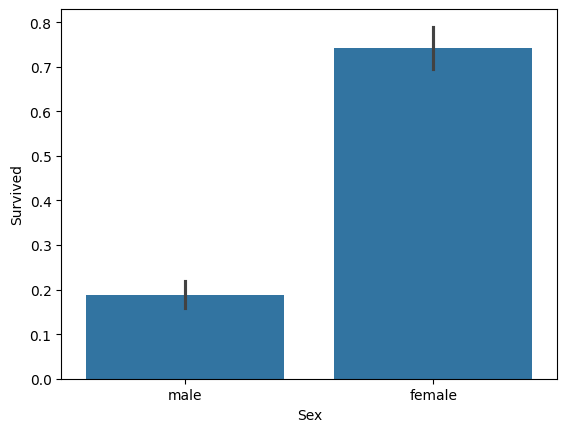

In [25]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

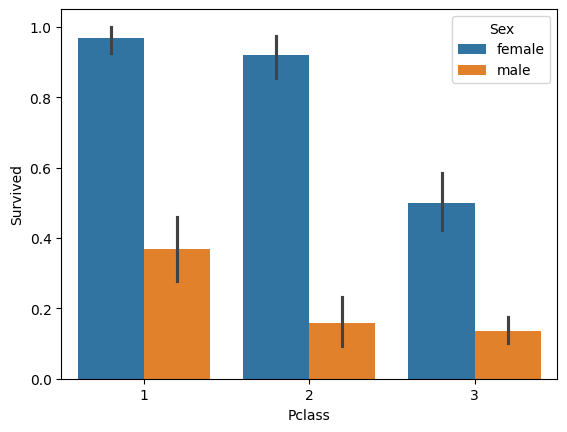

In [26]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

- 3등급 객실은 1,2등급 객실에 비해 생존하기 어려웠다
- 남성이 여성에 비해 생존하기 어려웠다

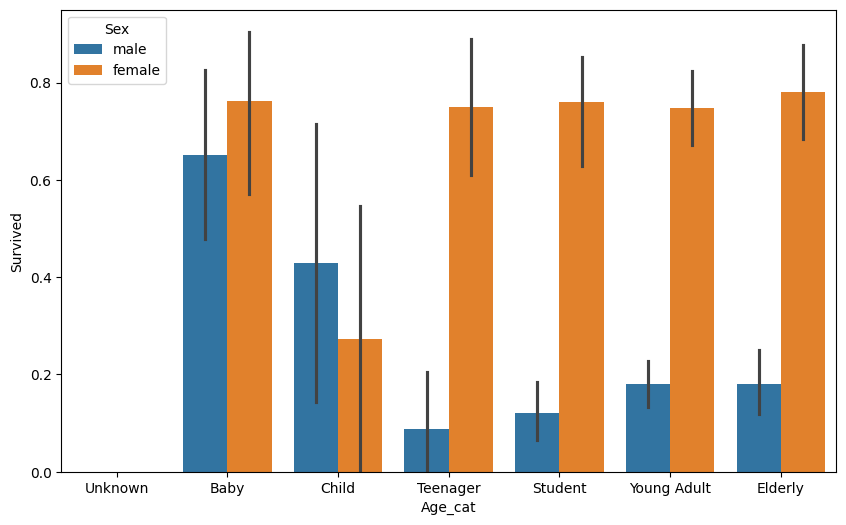

In [27]:
# 입력되는 age에 따라 구분값을 반환하는 함수. DataFrame의 apply(lambda로 사용)
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat= 'Baby'
    elif age <= 12: cat= 'Child'
    elif age <= 18: cat= 'Teenager'
    elif age <= 25: cat='Student'
    elif age <=35: cat = 'Young Adult'
    else: cat = 'Elderly'

    return cat

plt.figure(figsize=(10,6))

# 시각화 순서용 리스트 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Elderly']

# lambda식을 사용해 get_category() 함수 출력값을 새로운 파생변수 'Age_cat' 값으로 사용한다.
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

- 남성의 경우 어린아이이거나 상대적으로 노인이 살아남은 경향
- 여성의 경우 child를 제외한 전 구간에서 높은 생존룰

In [28]:
# 인코딩
from sklearn.preprocessing import LabelEncoder

# 인코딩 함수
def encode_features(dataDF):
    features = ['Cabin','Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        # 카테고리값이 유형에 따라 0~ (카테코리 유형수 -1) 까지의 숫자 값으로 변환
        le = le.fit(dataDF[feature])    
        dataDF[feature] = le.transform(dataDF[feature])
    
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [32]:
# 아래서 사용할 함수 정의

# null처리 함수
def fillna(df): # 재정의한다 override
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    return df

# 불필요한 feature 제거 함수 만든다
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 라벨 인코딩 수행 함수
def format_features(df):
    df['Cabin'] =df['Cabin'].str[:1]
    features = ['Cabin','Sex', 'Embarked']
    
    for feature in features:
        le = LabelEncoder()
        # 카테고리값이 유형에 따라 0~ (카테코리 유형수 -1) 까지의 숫자 값으로 변환
        le = le.fit(df[feature])    
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df=  drop_features(df)
    df = format_features(df)

    return df

        


-- 전처리 함수 생성

학습 데이터와 테스트 데이터를 분리하고 모델 학습 --

In [34]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

titanic_df = pd.read_csv('./data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)


C:\Users\Playdata\AppData\Local\Temp\ipykernel_16864\2794518279.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\Playdata\AppData\Local\Temp\ipykernel_16864\2794518279.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [35]:
# 학습용 데이터셋과 테스트 데이터셋을 나눠준다
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df,y_titanic_df, test_size=0.2, random_state=11)


In [36]:
print(len(X_train),len(X_test),len(y_train),len(y_test))

712 179 712 179


In [39]:
# 모델 선정 및 학습
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, 랜덤포레스트, 로지스틱 회귀
dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression(solver='liblinear') # liblinear 방식으로 분류

# DecisionTreeClassFier 학습/예측/평가
dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)
print("DecisionTreeClassifier의 정확도 : ", accuracy_score(y_test, dt_pred))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train,y_train)
rf_pred = rf_clf.predict(X_test)
print("RandomForestClassifier 정확도 : ", accuracy_score(y_test,rf_pred))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
print("LogisticRegression의 정확도 : ", accuracy_score(y_test,lr_pred))

DecisionTreeClassifier의 정확도 :  0.7877094972067039
RandomForestClassifier 정확도 :  0.8547486033519553
LogisticRegression의 정확도 :  0.8659217877094972


In [ ]:
# # k-fold 교차검증
# import numpy as np
# from sklearn.model_selection import KFold

# # kfold 함수
# def exec_kfold(clf, folds=5):
#     kfold = KFold(n_splits=folds)
#     scores = []

#     # K-fold 교차검증 수행
#     for iter_count,(train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
#         # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
#         X_train , x_Test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
#         y_train , y_Test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

#         # classfier 학습, 예측, 정확도 계산
#         clf.fit(X_train, y_train)
#         predictions = clf.predict(x_Test)
#         accuracy = accuracy_score(y_test,predictions)
#         scores.append(accuracy)
#         print(f"교차 검증 {iter_count}의 정확도: {accuracy}")
#     # 5개 fold에서의 평균 정확도
#     mean_scores = np.mean(scores)
#     print(f"평균 정확도: {mean_scores:.4f}")

# exec_kfold(dt_clf)


import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds, shuffle=True, random_state=42)
    scores = []

    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train = X_titanic_df.values[train_index]
        X_test  = X_titanic_df.values[test_index]
        y_train = y_titanic_df.values[train_index]
        y_test  = y_titanic_df.values[test_index]

        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)

        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print(f"교차 검증 {iter_count}의 정확도: {accuracy:.4f}")

    print(f"평균 정확도: {np.mean(scores):.4f}")

exec_kfold(dt_clf)


교차 검증 0의 정확도: 0.7821
교차 검증 1의 정확도: 0.7865
교차 검증 2의 정확도: 0.8202
교차 검증 3의 정확도: 0.7978
교차 검증 4의 정확도: 0.8202
평균 정확도: 0.8014


In [ ]:
# from sklearn.model_selection import cross_val_predict
# scores = cross_val_predict(dt_clf, X_titanic_df, y_titanic_df, cv=5)

# for iter_count, accuracy in enumerate(scores):
#     print(f"교차 검증 {iter_count}의 정확도: {accuracy:.4f}")

# print(f"평균 정확도: {np.mean(scores):.4f}")

import numpy as np
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5, scoring='accuracy')

for iter_count, acc in enumerate(scores):
    print(f"교차 검증 {iter_count}의 정확도: {acc:.4f}")

print(f"평균 정확도: {np.mean(scores):.4f}")


교차 검증 0의 정확도: 0.7430
교차 검증 1의 정확도: 0.7753
교차 검증 2의 정확도: 0.7921
교차 검증 3의 정확도: 0.7865
교차 검증 4의 정확도: 0.8427
평균 정확도: 0.7879


In [ ]:
# gridsearchcv로 최적의 하이퍼파라미터를 찾는다
from sklearn.model_selection import GridSearchCV

parameters = {
    "max_depth" : [2,3,5,10],       # 트리의 최대 깊이
    'min_samples_split' : [2,3,5],  # 노드 분할시 최소 샘플 수
    'min_samples_leaf' : [1,5,8]    # 리프 노드에 반듯이 남아야 하는 최소 샘플 수
}

grid_dclf = GridSearchCV(dt_clf,param_grid=parameters,scoring='accuracy', cv=5)
grid_dclf.fit(X_train,y_train)
print("GridSearchCV의 최적의 하이퍼 파라미터", grid_dclf.best_params_)
print("GridSearchCV의 최고의 정홛도", grid_dclf.best_score_)

best_dclf = grid_dclf.best_estimator_ # 최적의 모델 저장

# 최적의 하리퍼 파라미터로 학습된 Estimator로
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test,dpredictions)
print(f"DecisionTreeClassifier의 정확도 :  {accuracy:.4f}")

GridSearchCV의 최적의 하이퍼 파라미터 {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV의 최고의 정홛도 0.7991825076332119
DecisionTreeClassifier의 정확도 : , 0.8715
